**Two-Hoop Loop Function**

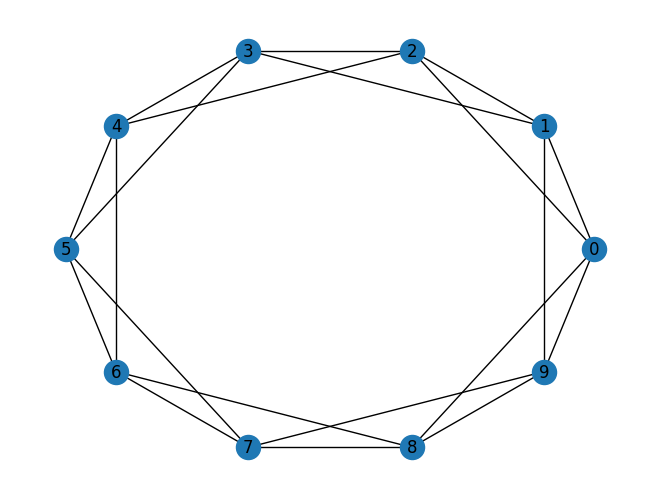

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def k_hop_loop(n,k=2, weight_sum = 1):
  positions = nx.circular_layout(range(n))

  # create a graph with n nodes
  G = nx.Graph()
  G.add_nodes_from(range(n))

  # add edges between each node and its two neighbors
  for j in range(1,k+1):
    for i in range(n):
        G.add_edge(i, (i + j) % n,weight = 1)
        G.add_edge(i, (i - j) % n, weight = 2)


  # draw the graph
  nx.draw(G, positions, with_labels=True)
  return G, positions

# example usage
k_hop_loop(10,2)
plt.show()

**Two-Hop Loop with Weights and Normalization**

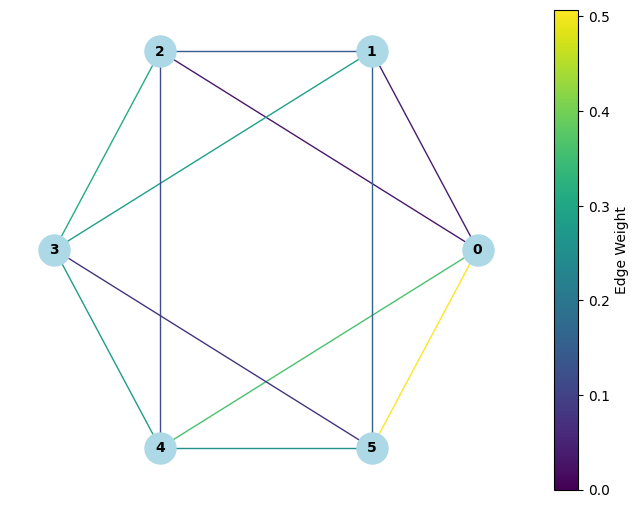

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import matplotlib.colors as mcolors

def normalize_weights(G):
  for node in G.nodes:
    edges = list(G.edges(node, data=True))
    total_weight = sum([d['weight'] for _, _, d in edges])
    for (u, v, d) in edges:
      d['weight'] /= total_weight

def two_hop_loop(n):
  positions = nx.circular_layout(range(n))

  # create a graph with n nodes
  G = nx.Graph()
  G.add_nodes_from(range(n))

  # add edges between each node and its two neighbors
  for i in range(n):
    G.add_edge(i, (i + 1) % n, weight=random.uniform(0, 1))
    G.add_edge(i, (i - 1) % n, weight=random.uniform(0, 1))

  # add edges between each node and its neighbors' neighbors
  for i in range(n):
    G.add_edge(i, (i + 2) % n, weight=random.uniform(0, 1))
    G.add_edge(i, (i - 2) % n, weight=random.uniform(0, 1))

  # normalize weights
  normalize_weights(G)

  # get weights and normalize them for colormap
  weights = nx.get_edge_attributes(G, 'weight').values()
  norm = plt.Normalize(vmin=0, vmax=max(weights))
  colors = plt.cm.viridis(norm(list(weights)))

  # draw the graph with color-coded edges
  edges = G.edges(data=True)
  edge_colors = [plt.cm.viridis(norm(edge[2]['weight'])) for edge in edges]
  nx.draw(G, positions, with_labels=True, node_color='lightblue', node_size=500, font_size=10,
          font_weight='bold', edge_color=edge_colors, edge_cmap=plt.cm.viridis)

  # Create colorbar
  sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
  sm.set_array([])
  plt.colorbar(sm, ax = plt.gca(), label='Edge Weight')

  return G, positions

# example usage
G, positions = two_hop_loop(6)
plt.show()

**Paired Two-Hop Loop Function**

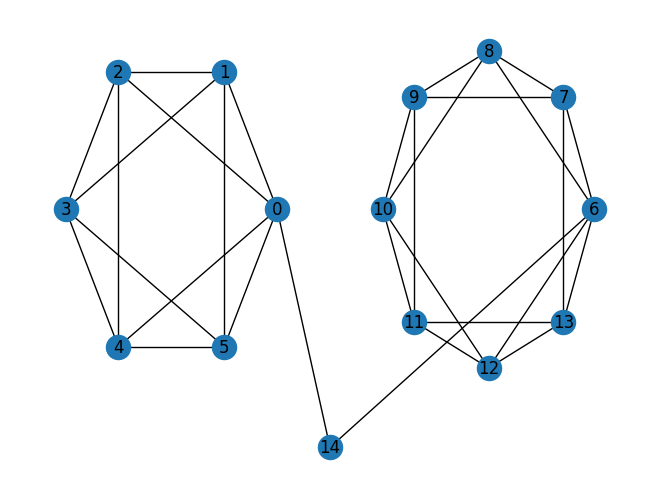

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def paired_two_hop_loop(n1, n2):
    # create two two-hop loop graphs
    G1, pos1 = k_hop_loop(n1)
    G2, pos2 = k_hop_loop(n2)

    # adjust positions to place the second graph to the right of the first graph
    offset = 3.0  # distance to separate the two graphs
    for key in pos2:
        pos2[key][0] += offset

    # relabel nodes in the second graph to avoid overlap
    G2 = nx.relabel_nodes(G2, lambda x: x + n1)
    pos2 = {key + n1: value for key, value in pos2.items()}

    # create a new graph that includes both two-hop loops
    G = nx.Graph()
    G.add_nodes_from(G1.nodes(data=True))
    G.add_nodes_from(G2.nodes(data=True))
    G.add_edges_from(G1.edges(data=True))
    G.add_edges_from(G2.edges(data=True))

    # add a single node connecting to one node from each two-hop loop
    connecting_node = n1 + n2
    G.add_node(connecting_node)
    G.add_edge(connecting_node, 0)  # Connect to the first node of G1
    G.add_edge(connecting_node, n1)  # Connect to the first node of G2

    # update positions for drawing
    pos1.update(pos2)
    pos1[connecting_node] = [offset / 2, -1.5]

    # draw the graph
    nx.draw(G, pos1, with_labels=True)
    return G

# example usage
paired_two_hop_loop(6, 8)
plt.show()

**Paired Two-Hop Loop with Weights and Normalization**

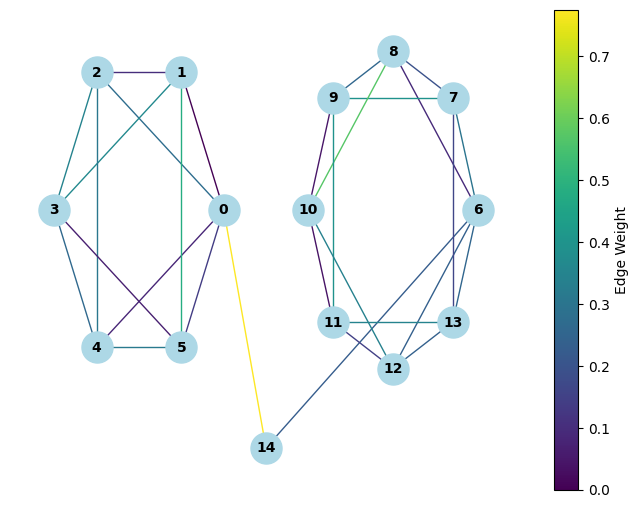

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import matplotlib.colors as mcolors

# same functions defined for ability to run
def normalize_weights(G):
  for node in G.nodes:
    edges = list(G.edges(node, data=True))
    total_weight = sum([d['weight'] for _, _, d in edges])
    for (u, v, d) in edges:
      d['weight'] /= total_weight

def two_hop_loop(n):
  positions = nx.circular_layout(range(n))

  # create a graph with n nodes
  G = nx.Graph()
  G.add_nodes_from(range(n))

  # add edges between each node and its two neighbors
  for i in range(n):
    G.add_edge(i, (i + 1) % n, weight=random.uniform(0, 1))
    G.add_edge(i, (i - 1) % n, weight=random.uniform(0, 1))

  # add edges between each node and its neighbors' neighbors
  for i in range(n):
    G.add_edge(i, (i + 2) % n, weight=random.uniform(0, 1))
    G.add_edge(i, (i - 2) % n, weight=random.uniform(0, 1))

  # normalize weights so that the sum of weights for edges connected to each node equals 1
  normalize_weights(G)

  return G, positions

def paired_two_hop_loop(n1, n2):
  # create two two-hop loop graphs
  G1, pos1 = two_hop_loop(n1)
  G2, pos2 = two_hop_loop(n2)

  # adjust positions to place the second graph to the right of the first graph
  offset = 3.0
  for key in pos2:
    pos2[key][0] += offset

  # relabel nodes in the second graph to avoid overlap
  G2 = nx.relabel_nodes(G2, lambda x: x + n1)
  pos2 = {key + n1: value for key, value in pos2.items()}

  # create a new graph that includes both two-hop loops
  G = nx.Graph()
  G.add_nodes_from(G1.nodes(data=True))
  G.add_nodes_from(G2.nodes(data=True))
  G.add_edges_from(G1.edges(data=True))
  G.add_edges_from(G2.edges(data=True))

  # add a single node connecting to one node from each two-hop loop
  connecting_node = n1 + n2
  G.add_node(connecting_node)
  G.add_edge(connecting_node, 0, weight=random.uniform(0, 1))
  G.add_edge(connecting_node, n1, weight=random.uniform(0, 1))

  # update positions for drawing
  pos1.update(pos2)
  pos1[connecting_node] = [offset / 2, -1.5]

  # normalize weights for the combined graph
  normalize_weights(G)

  # get weights and normalize them for colormap
  weights = nx.get_edge_attributes(G, 'weight').values()
  norm = plt.Normalize(vmin=0, vmax=max(weights))
  colors = plt.cm.viridis(norm(list(weights)))

  # draw the graph with color-coded edges
  edges = G.edges(data=True)
  edge_colors = [plt.cm.viridis(norm(edge[2]['weight'])) for edge in edges]
  nx.draw(G, pos1, with_labels=True, node_color='lightblue', node_size=500, font_size=10,
          font_weight='bold', edge_color=edge_colors, edge_cmap=plt.cm.viridis)

  # create colorbar
  sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
  sm.set_array([])
  plt.colorbar(sm, ax = plt.gca(), label='Edge Weight')

  return G

# example usage
paired_two_hop_loop(6, 8)
plt.show()

**Erdos-Renyi Graph with Mean-Degree**

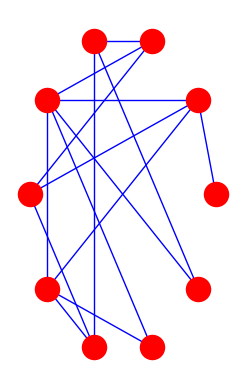

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from math import comb

n = 10
c = 3 #avg degree
e = (c*n)/2 #total edges
P = e/comb(n, 2) #density
G = nx.Graph()
for i in range(n):
    for j in range(i+1, n):
        if random.random() <= P:
            G.add_edge(i, j)

subax1 = plt.subplot(121)
nx.draw(G, pos=nx.circular_layout(G), node_color='r', edge_color='b')